In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_pickle('./finefood_dataset_cleaned.pkl')
df.head()

,score,summary,text,text_cleaned,summary_cleaned,word_counts_summary,word_counts_text,word_counts_summary_cleaned,word_counts_text_cleaned
0,5.0,good quality dog food,i have bought several of the vitality canned d...,bought sever vital can dog food product found ...,good qualiti dog food,4,48,4,23
1,1.0,not as advertised,product arrived labeled as jumbo salted peanut...,product arriv label jumbo salt peanut peanut a...,advertis,3,31,1,18
2,4.0,"""delight"" says it all",this is a confection that has been around a fe...,confect around centuri light pillowi citrus ge...,delight say,4,94,2,39
3,2.0,cough medicine,if you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...,cough medicin,2,41,2,18
4,5.0,great taffy,great taffy at a great price. there was a wid...,great taffi great price wide assort yummi taff...,great taffi,2,27,2,13


In [3]:
df.shape

(395006, 9)

In [4]:
df = df.sample(n=50000, random_state = 123)
df.shape

(50000, 9)

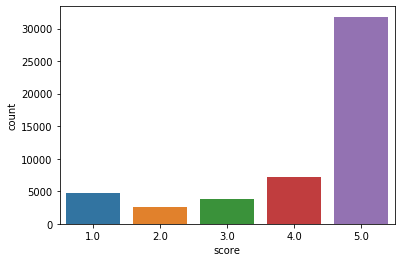

In [5]:
sns.countplot(df.score)

In [6]:
indexes = df.index[df['score'] == '5.0'].tolist()
drop_indices = np.random.choice(indexes, 24000, replace=False)
df = df.drop(drop_indices)
df.shape

(26000, 9)

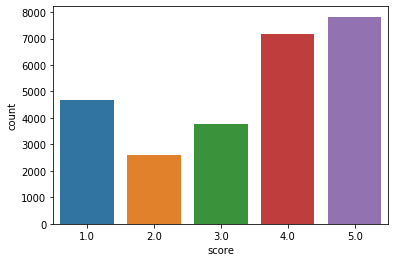

In [7]:
sns.countplot(df.score)

In [8]:
df["score"] = df['score'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26000 entries, 462490 to 37238
Data columns (total 9 columns):
score                          26000 non-null float64
summary                        26000 non-null object
text                           26000 non-null object
text_cleaned                   26000 non-null object
summary_cleaned                26000 non-null object
word_counts_summary            26000 non-null int64
word_counts_text               26000 non-null int64
word_counts_summary_cleaned    26000 non-null int64
word_counts_text_cleaned       26000 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 3.2+ MB


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text_cleaned'], df['score'], test_size = 0.2, random_state = 123)
print("Shapes X_train, X_test, y_train, y_test: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shapes X_train, X_test, y_train, y_test:  (20800,) (5200,) (20800,) (5200,)


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

bi_gram = CountVectorizer(ngram_range=(1,2))
x_tr_bi = bi_gram.fit_transform(X_train)
x_test_bi = bi_gram.transform(X_test)



In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(x_tr_bi, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [18]:
prediction = clf.predict(x_test_bi)


In [19]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, prediction)

array([[[4274,    0],
        [ 926,    0]],

       [[4706,    0],
        [ 494,    0]],

       [[4491,    0],
        [ 709,    0]],

       [[3663,   70],
        [1399,   68]],

       [[ 123, 3473],
        [  15, 1589]]])

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, prediction)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, prediction,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, prediction,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, prediction,average='macro')))

Accuracy on test set: 31.865%
Precision on test set: 0.161
Recall on test set: 0.207
F1-Score on test set: 0.112


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn.model_selection import GridSearchCV

nEstimator = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
depth = [5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]

RF = RandomForestClassifier()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
gsv.fit(x_tr_bi, y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))

Fitting 5 folds for each of 272 candidates, totalling 1360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 1360 out of 1360 | elapsed: 34.7min finished


Best HyperParameter:  {'max_depth': 140, 'n_estimators': 16}
0.3802626102243574


NameError: name 'plt' is not defined

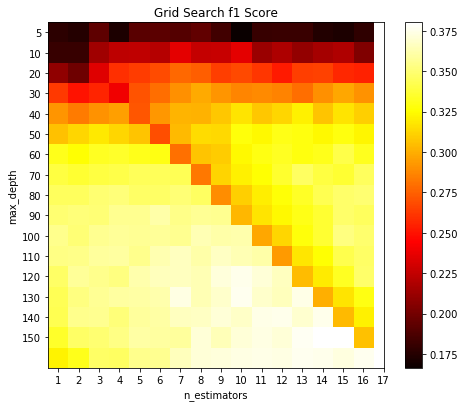

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(nEstimator)), nEstimator)
plt.yticks(np.arange(len(depth)), depth)
plt.title('Grid Search f1 Score')
plt.show()